# Analyze the US Distribution of Wealth, economic and social gaps by State



You are working as a Research Analyst at a renowned consultancy. After working on a previous project and identifying the US as an ideal country for investment, it’s time to dig deeper into the numbers. <br>
The main objective is to create a development impact assessment. <br>
In order to achieve sustainability goals, it’s important to choose sites with the right population, education, infrastructure, purchasing power and diversification.

You will first need to choose significant variables through visualization, factorial analysis, group similar variables together and finally create clusters of states with similar characteristics.

Perform your analysis in the following order:

> 1) **Exploratory Data Analysis** <br>
> 2) **Statistics and Probability**<br>
> 3) **Machine Learning**<br>


Your analysis will help rank states by multiple factors to show which would benefit from which projects and what they can become like after such projects are implemented.

In [86]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.cluster.hierarchy import dendrogram, linkage
sns.set()

#import data
data = pd.read_excel("US State Data.xlsx")

# import altair as alt (Graphs look better in quality than matplotlib)

## **Get to know the Data**
Transform all data into a cross sectional format as follows (Each variable vertically has 50 observations for all states)

In [91]:
df = pd.read_excel("US State Data Transformed.xlsx")
# Remove 0-based index and start with 1 instead
df.index = df.index + 1
# Replace all missing values / NaNs with zeros in entire DataFrame
df.fillna(0, inplace=True)
df.head(10)

,State,Total Population 2021,Population Growth or Decline 2010 to 2021,Households 2020,Labor Force (persons) Ann. Avg. 2021,Unemployment Rate Ann. Avg. 2021,Per Capita Personal Income 2021,Median Household Income 2020,Poverty Rate 2020,High School Diploma or More - Pct. of Adults 25+ 2020,...,Unemployment Rate 5-Year Pct. Chg,Unemployment Rate 10-Year Pct. Chg,Total Population 25 and Older,Less than 9th Grade,"9th to 12th, No Diploma",High School Graduate (includes equiv.),"Some College, No Degree",Associate Degree,Bachelor's Degree,"Graduate, Professional or Doctorate Degree"
1,Alabama,5039877,0.054,1888504,0.0,0.0,49769,53958,14.9,0.869,...,0.000,0.000,3344006,133650,305297,1014342,721609,292064,546674,330370
2,Alaska,732673,0.032,255173,0.0,0.0,65813,79961,9.6,0.931,...,0.000,0.000,483436,11513,21663,137486,125645,42162,90161,54806
3,Arizona,7276316,0.138,2643430,0.0,0.0,55487,64652,12.8,0.879,...,0.000,0.000,4846056,248570,339349,1151988,1208298,429153,911228,557470
4,Arkansas,3025891,0.038,1170544,0.0,0.0,50625,51146,15.2,0.872,...,0.000,0.000,2026722,95403,164957,686812,445268,151587,308648,174047
5,California,39237836,0.053,13103114,0.0,0.0,76614,83001,11.5,0.839,...,0.000,0.000,26665143,2367996,1918542,5431385,5566520,2123827,5764827,3492046
6,Colorado,5812069,0.156,2137402,0.0,0.0,70706,77688,9.0,0.921,...,0.000,0.000,3900754,128623,180162,827081,809908,332127,1015989,606864
7,Connecticut,3605597,0.009,1385437,0.0,0.0,83294,79723,9.7,0.909,...,0.000,0.000,2489205,99436,126114,655381,419238,193036,551459,444541
8,Delaware,1003384,0.117,370953,496430.0,5.3,59931,71335,10.9,0.906,...,0.178,-0.303,679870,22233,41610,210998,128397,54589,129092,92951
9,Florida,21781128,0.158,7931313,10312768.0,4.6,62270,61724,12.4,0.885,...,-0.061,-0.540,15255326,701815,1049983,4308542,3013331,1521709,2938593,1721353
10,Georgia,10799566,0.115,3830264,5186969.0,3.9,55786,62800,14.0,0.879,...,-0.278,-0.614,6996425,311893,536760,1925374,1410017,559719,1377311,875351


In [89]:
# Check data types
df.info()
# Count missing values in each column
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 1 to 50
Columns: 116 entries, State to Graduate, Professional or Doctorate Degree
dtypes: float64(33), int64(82), object(1)
memory usage: 45.4+ KB


State                                         0
Total Population 2021                         0
Population Growth or Decline 2010 to 2021     0
Households 2020                               0
Labor Force (persons) Ann. Avg. 2021          0
                                             ..
High School Graduate (includes equiv.)        0
Some College, No Degree                       0
Associate Degree                              0
Bachelor's Degree                             0
Graduate, Professional or Doctorate Degree    0
Length: 116, dtype: int64

### **Visualization of Demographics**

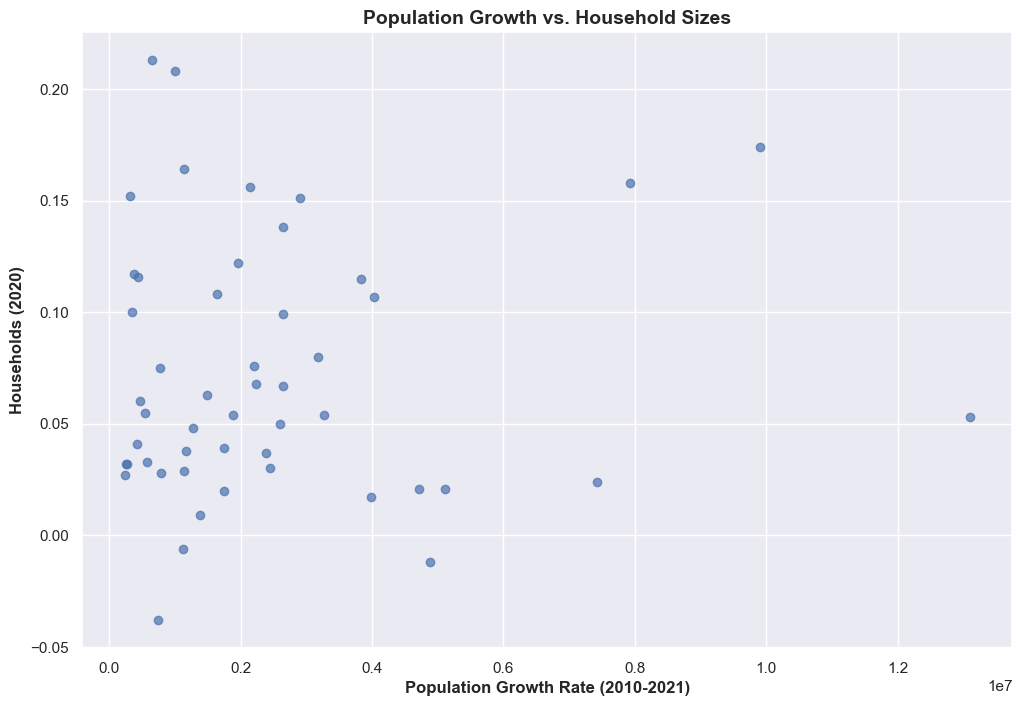

In [84]:
# What is the population growth trends from 2010 to 2021 and Households sizes in 2020 makeup across states using scatterplots
df_population = df[["State", "Total Population 2021", "Population Growth or Decline 2010 to 2021", "Households 2020",]]


plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_population["Households 2020"],
                df_population["Population Growth or Decline 2010 to 2021"],
                alpha = 0.7,
                )

plt.title("Population Growth vs. Household Sizes", fontsize = 14, weight = "bold")
plt.xlabel("Population Growth Rate (2010-2021)", fontweight = "bold")
plt.ylabel("Households (2020)", fontweight = "bold")
plt.show()
# Compare the total population of each state in 2021 using a horizontal bar chart. X-axis: Population, Y-axis: States.
# Create a line chart to compare the population growth rate from 2010 to 2021 for each state. X-axis: States, Y-axis: Growth Rate.
# What is the percentage change for population every 10 years?

# Visualize your findings

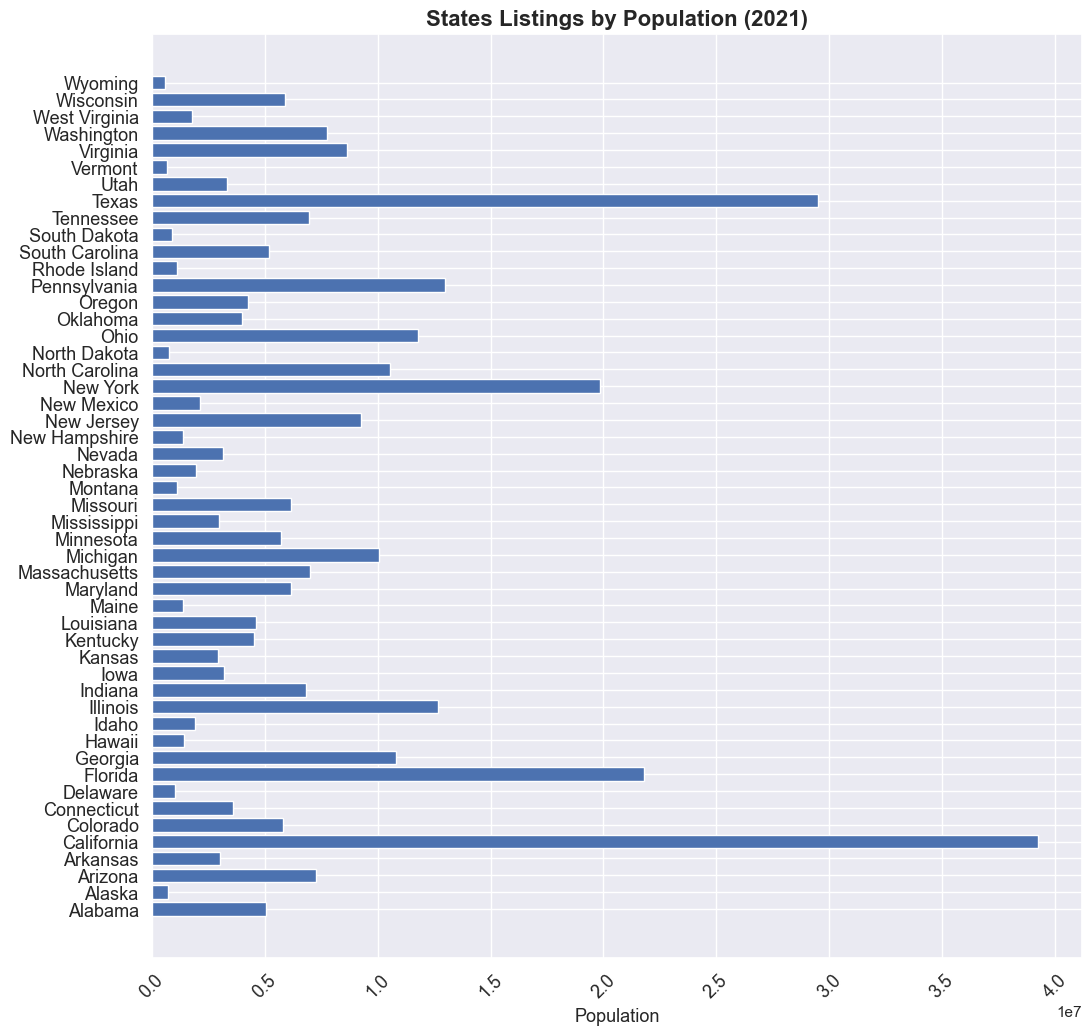

In [74]:
# Compare the total population of each state in 2021 using a horizontal bar chart. X-axis: Population, Y-axis: States.
plt.figure(figsize = (12, 12))
# colors = ["orange"]
plt.barh(y=df_population["State"],
         width=df_population["Total Population 2021"],
         )
plt.xticks(rotation = 45, fontsize = 13)
plt.yticks(fontsize = 13)
plt.title("States Listings by Population (2021)", fontsize = 16, fontweight = "bold")
plt.xlabel("Population", fontsize = 13)
plt.show()

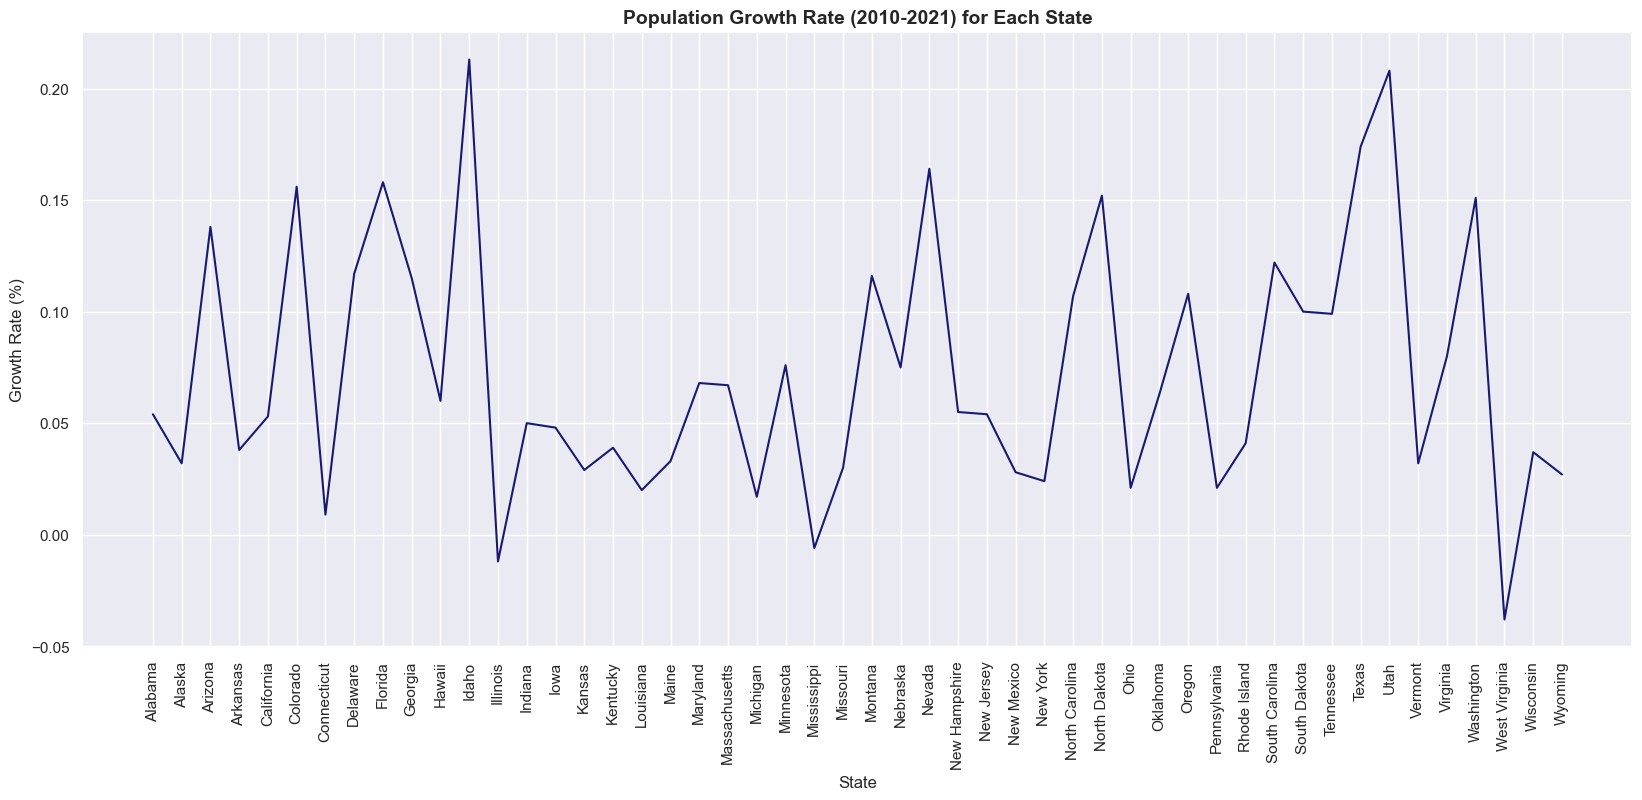

In [75]:
# Create a line chart to compare the population growth rate from 2010 to 2021 for each state. X-axis: States, Y-axis: Growth Rate.
plt.figure(figsize = (20, 8))
plt.plot(df_population["State"], df_population["Population Growth or Decline 2010 to 2021"], color = 'midnightblue')
plt.title('Population Growth Rate (2010-2021) for Each State', fontsize = 14, fontweight = 'bold')
plt.ylabel('Growth Rate (%)')
plt.xlabel('State')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [85]:
# What is the percentage change for population every 10 years?
df_population_percent_change = df_population["Population Growth or Decline 2010 to 2021"] * 100

df_population_percent_change

1      5.4
2      3.2
3     13.8
4      3.8
5      5.3
6     15.6
7      0.9
8     11.7
9     15.8
10    11.5
11     6.0
12    21.3
13    -1.2
14     5.0
15     4.8
16     2.9
17     3.9
18     2.0
19     3.3
20     6.8
21     6.7
22     1.7
23     7.6
24    -0.6
25     3.0
26    11.6
27     7.5
28    16.4
29     5.5
30     5.4
31     2.8
32     2.4
33    10.7
34    15.2
35     2.1
36     6.3
37    10.8
38     2.1
39     4.1
40    12.2
41    10.0
42     9.9
43    17.4
44    20.8
45     3.2
46     8.0
47    15.1
48    -3.8
49     3.7
50     2.7
Name: Population Growth or Decline 2010 to 2021, dtype: float64